In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.utils import resample

from imblearn.over_sampling import RandomOverSampler

In [2]:
pd.set_option('display.max_columns', None)

# _________________________________
# CARGAS DE TABLAS

In [3]:
tabla_principal =  pd.read_csv("C:/Users/Javi/Documents/bootcamp/proyectos/machine_learning/academic_performance_analytics_complete.csv", sep=',')
tabla_principal

,Timestamp,Student_ID,Age,Gender,Ethnicity,SES,Location,Enrollment_Status,GPA,Attendance_Rate,Study_Hours_per_Week,Extracurricular_Participation,Course_Load,Major_Field_of_Study,Previous_Academic_Performance,Course_Type,Course_Difficulty,Instructor_Rating,Class_Size,Sentiment_Score,Feedback_Length,Access_to_Learning_Materials,Internet_Accessibility,Counseling_Sessions_Attended,Tutoring_Hours,Assignment_Scores,Midterm_Scores,Final_Exam_Scores,Learning_Style_Compatibility,Career_Alignment_Indicator,Library_Usage_Frequency,Study_Group_Participation,Resource_Access_Score,Learning_Material_Satisfaction,Peer_Interaction_Score,Academic_Support_Utilization,Stress_Indicator_Score,Assignment_Completion_Rate,Learning_Satisfaction_Level,Academic_Performance_Category,Sentiment_Classification,Requirement_Fulfillment_Status,Course_Satisfaction_Level,Engagement_Level
0,2018-07-14 06:00:00,1678,25,0,White,Low,"Texas, Dallas",0,2.283531,0.9,17.647264,0,6,Arts,60.237666,Core,Hard,3.776889,30,0.733300,484,0,1,1,0.000000,83.235872,56.684179,74.283938,0,1,3,0,0.696702,1,0.341722,0,0.346726,0.7,Medium,High,Neutral,Partially Met,Neutral,Active
1,2018-09-27 03:00:00,3106,19,1,White,Low,"Texas, Dallas",0,2.787184,0.6,7.304669,0,5,Engineering,71.919002,Core,Hard,3.708644,30,0.179273,450,0,0,0,0.515937,70.477437,63.487994,69.581913,0,1,3,1,0.655516,0,0.665257,0,0.957973,0.8,Medium,Medium,Negative,Partially Met,Neutral,Active
2,2022-04-25 00:00:00,4350,22,1,African American,Low,"Texas, Dallas",0,2.689566,0.8,12.816062,1,5,Engineering,79.622769,Elective,Easy,4.453540,30,0.357695,496,0,0,0,5.293700,78.254544,81.371728,71.698227,0,0,1,0,0.666346,1,0.501590,0,0.431574,0.7,Low,Medium,Neutral,Fully Met,Satisfied,Moderate
3,2024-02-24 10:00:00,2890,20,0,White,Medium,"Texas, Dallas",0,2.486635,0.6,19.797873,1,4,Arts,82.419630,Elective,Moderate,3.558563,30,0.532631,162,0,0,0,0.000000,90.783972,66.462219,70.034328,1,0,0,0,0.646857,0,0.665658,0,0.633358,0.8,High,High,Neutral,Partially Met,Unsatisfied,Active
4,2020-10-09 23:00:00,4019,25,1,White,Medium,"Texas, Dallas",0,3.258069,1.0,14.457067,0,5,Engineering,69.389492,Advanced,Easy,2.715564,30,0.714675,234,1,1,0,0.830865,65.559076,92.394189,55.446190,0,1,0,0,0.546623,0,0.555273,0,0.581689,0.8,Medium,Medium,Positive,Partially Met,Neutral,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61340,2019-10-29 18:00:00,3885,26,1,White,Low,"Texas, Dallas",0,2.149150,0.7,24.606399,0,4,Arts,78.469013,Elective,Moderate,3.320002,10,0.571314,210,0,0,0,0.000000,79.638439,48.430788,80.654766,0,1,0,1,0.678753,1,0.481441,0,0.627292,0.9,High,Low,Positive,Fully Met,Satisfied,Moderate
61341,2020-09-11 18:00:00,2972,29,1,White,High,"Texas, Dallas",1,2.452148,0.9,13.969722,0,5,Arts,75.114187,Elective,Moderate,4.084590,10,0.491516,101,0,0,0,2.968496,71.845174,70.337474,84.596145,0,1,3,0,0.553857,1,0.621769,0,0.990375,0.8,Medium,High,Neutral,Partially Met,Neutral,Active
61342,2018-11-14 12:00:00,3397,19,1,White,Low,"Texas, Dallas",1,2.372740,0.9,19.750728,0,4,Science,67.443383,Elective,Hard,3.832986,30,0.454625,158,0,0,0,0.000000,69.577117,69.073187,59.010887,0,0,3,0,0.632214,0,0.498190,0,0.469423,0.8,High,Medium,Positive,Partially Met,Satisfied,Active
61343,2023-03-15 22:00:00,4617,25,0,White,High,"Texas, Dallas",0,2.654484,0.8,15.507835,0,4,Law,67.280996,Core,Hard,3.144849,20,0.650554,495,0,0,2,0.872598,65.974002,57.328627,72.791444,1,0,5,1,0.824990,0,0.420456,1,0.633345,0.9,High,Medium,Neutral,Partially Met,Satisfied,Inactive


# _________________________________
# TIPOS DE DATOS

In [4]:
# Tipos de datos de las columnas de tabla1
print("Tipos de datos de tabla1:")
print(tabla_principal.dtypes)





Tipos de datos de tabla1:
Timestamp                          object
Student_ID                          int64
Age                                 int64
Gender                              int64
Ethnicity                          object
SES                                object
Location                           object
Enrollment_Status                   int64
GPA                               float64
Attendance_Rate                   float64
Study_Hours_per_Week              float64
Extracurricular_Participation       int64
Course_Load                         int64
Major_Field_of_Study               object
Previous_Academic_Performance     float64
Course_Type                        object
Course_Difficulty                  object
Instructor_Rating                 float64
Class_Size                          int64
Sentiment_Score                   float64
Feedback_Length                     int64
Access_to_Learning_Materials        int64
Internet_Accessibility              int64
Counseli

# VISUALIZACION PRE-PREPARACION

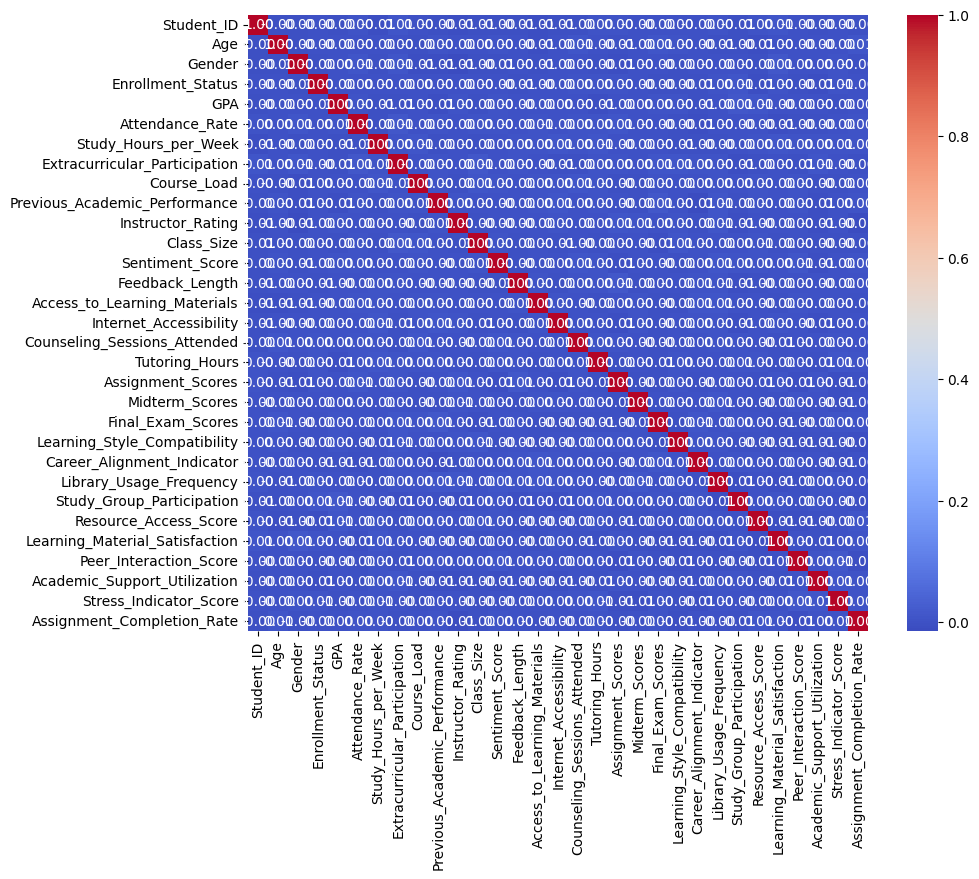

In [5]:

# Suponiendo que ya tienes un DataFrame llamado tabla2
# tabla2 = pd.read_csv('ruta/a/tu/archivo.csv')  # Si necesitas cargar los datos desde un archivo
# Seleccionar solo las columnas numéricas
tabla_principal_numerica = tabla_principal.select_dtypes(include=['number'])
# Obtener la matriz de correlación
matriz_correlacion = tabla_principal_numerica.corr()
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))
# Dibujar el mapa de calor
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f')
# Mostrar el gráfico
plt.show()

# _________________________________
# PREPARAR TABLA 

In [6]:
tabla_principal.head(1)


,Timestamp,Student_ID,Age,Gender,Ethnicity,SES,Location,Enrollment_Status,GPA,Attendance_Rate,Study_Hours_per_Week,Extracurricular_Participation,Course_Load,Major_Field_of_Study,Previous_Academic_Performance,Course_Type,Course_Difficulty,Instructor_Rating,Class_Size,Sentiment_Score,Feedback_Length,Access_to_Learning_Materials,Internet_Accessibility,Counseling_Sessions_Attended,Tutoring_Hours,Assignment_Scores,Midterm_Scores,Final_Exam_Scores,Learning_Style_Compatibility,Career_Alignment_Indicator,Library_Usage_Frequency,Study_Group_Participation,Resource_Access_Score,Learning_Material_Satisfaction,Peer_Interaction_Score,Academic_Support_Utilization,Stress_Indicator_Score,Assignment_Completion_Rate,Learning_Satisfaction_Level,Academic_Performance_Category,Sentiment_Classification,Requirement_Fulfillment_Status,Course_Satisfaction_Level,Engagement_Level
0,2018-07-14 06:00:00,1678,25,0,White,Low,"Texas, Dallas",0,2.283531,0.9,17.647264,0,6,Arts,60.237666,Core,Hard,3.776889,30,0.7333,484,0,1,1,0.0,83.235872,56.684179,74.283938,0,1,3,0,0.696702,1,0.341722,0,0.346726,0.7,Medium,High,Neutral,Partially Met,Neutral,Active


In [7]:
tabla1 = tabla_principal[["Age", "Gender", "Ethnicity", "SES", "Internet_Accessibility", "Attendance_Rate", "Study_Hours_per_Week", "Extracurricular_Participation", "Study_Group_Participation", "Access_to_Learning_Materials", "Academic_Support_Utilization", "Course_Difficulty", "Assignment_Scores", "Midterm_Scores", "Final_Exam_Scores", "GPA"]]
tabla1

,Age,Gender,Ethnicity,SES,Internet_Accessibility,Attendance_Rate,Study_Hours_per_Week,Extracurricular_Participation,Study_Group_Participation,Access_to_Learning_Materials,Academic_Support_Utilization,Course_Difficulty,Assignment_Scores,Midterm_Scores,Final_Exam_Scores,GPA
0,25,0,White,Low,1,0.9,17.647264,0,0,0,0,Hard,83.235872,56.684179,74.283938,2.283531
1,19,1,White,Low,0,0.6,7.304669,0,1,0,0,Hard,70.477437,63.487994,69.581913,2.787184
2,22,1,African American,Low,0,0.8,12.816062,1,0,0,0,Easy,78.254544,81.371728,71.698227,2.689566
3,20,0,White,Medium,0,0.6,19.797873,1,0,0,0,Moderate,90.783972,66.462219,70.034328,2.486635
4,25,1,White,Medium,1,1.0,14.457067,0,0,1,0,Easy,65.559076,92.394189,55.446190,3.258069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61340,26,1,White,Low,0,0.7,24.606399,0,1,0,0,Moderate,79.638439,48.430788,80.654766,2.149150
61341,29,1,White,High,0,0.9,13.969722,0,0,0,0,Moderate,71.845174,70.337474,84.596145,2.452148
61342,19,1,White,Low,0,0.9,19.750728,0,0,0,0,Hard,69.577117,69.073187,59.010887,2.372740
61343,25,0,White,High,0,0.8,15.507835,0,1,0,1,Hard,65.974002,57.328627,72.791444,2.654484


In [8]:
tabla1.dtypes

Age                                int64
Gender                             int64
Ethnicity                         object
SES                               object
Internet_Accessibility             int64
Attendance_Rate                  float64
Study_Hours_per_Week             float64
Extracurricular_Participation      int64
Study_Group_Participation          int64
Access_to_Learning_Materials       int64
Academic_Support_Utilization       int64
Course_Difficulty                 object
Assignment_Scores                float64
Midterm_Scores                   float64
Final_Exam_Scores                float64
GPA                              float64
dtype: object

In [9]:
non_numeric_columns = tabla1.select_dtypes(include=['object']).columns
numeric_columns = tabla1.select_dtypes(include=['int64']).columns

In [10]:

tabla1 = pd.get_dummies(tabla1, columns=non_numeric_columns)

In [11]:
tabla1.columns = tabla1.columns.str.lower()


In [12]:
tabla1.dtypes

age                                int64
gender                             int64
internet_accessibility             int64
attendance_rate                  float64
study_hours_per_week             float64
extracurricular_participation      int64
study_group_participation          int64
access_to_learning_materials       int64
academic_support_utilization       int64
assignment_scores                float64
midterm_scores                   float64
final_exam_scores                float64
gpa                              float64
ethnicity_african american          bool
ethnicity_asian                     bool
ethnicity_hispanic                  bool
ethnicity_other                     bool
ethnicity_white                     bool
ses_high                            bool
ses_low                             bool
ses_medium                          bool
course_difficulty_easy              bool
course_difficulty_hard              bool
course_difficulty_moderate          bool
dtype: object

In [13]:
# Cambiar el tipo de dato de las columnas int64 a int16
int_columns = tabla1.select_dtypes(include='int64').columns
tabla1[int_columns] = tabla1[int_columns].astype('int16')
# Verificar los cambios
print(tabla1.dtypes)

age                                int16
gender                             int16
internet_accessibility             int16
attendance_rate                  float64
study_hours_per_week             float64
extracurricular_participation      int16
study_group_participation          int16
access_to_learning_materials       int16
academic_support_utilization       int16
assignment_scores                float64
midterm_scores                   float64
final_exam_scores                float64
gpa                              float64
ethnicity_african american          bool
ethnicity_asian                     bool
ethnicity_hispanic                  bool
ethnicity_other                     bool
ethnicity_white                     bool
ses_high                            bool
ses_low                             bool
ses_medium                          bool
course_difficulty_easy              bool
course_difficulty_hard              bool
course_difficulty_moderate          bool
dtype: object


In [14]:
# Contar los valores nulos de cada columna
null_counts = tabla1.isnull().sum()
print(null_counts)

age                              0
gender                           0
internet_accessibility           0
attendance_rate                  0
study_hours_per_week             0
extracurricular_participation    0
study_group_participation        0
access_to_learning_materials     0
academic_support_utilization     0
assignment_scores                0
midterm_scores                   0
final_exam_scores                0
gpa                              0
ethnicity_african american       0
ethnicity_asian                  0
ethnicity_hispanic               0
ethnicity_other                  0
ethnicity_white                  0
ses_high                         0
ses_low                          0
ses_medium                       0
course_difficulty_easy           0
course_difficulty_hard           0
course_difficulty_moderate       0
dtype: int64


In [15]:
# Crear la nueva columna 'extracurricular_participation'
tabla1['extracurricular_participation'] = ((tabla1['extracurricular_participation'] == 1) | 
                                              (tabla1['study_group_participation'] == 1) | 
                                              (tabla1['access_to_learning_materials'] == 1)).astype(int)

# Eliminar las columnas originales
tabla1.drop(columns=['study_group_participation', 'access_to_learning_materials'], inplace=True)

# Reordenar las columnas para colocar 'extracurricular_participation' en la séptima posición
cols = tabla1.columns.tolist()
cols.insert(6, cols.pop(cols.index('extracurricular_participation')))
tabla1 = tabla1[cols]

# Mostrar el resultado
tabla1.head()

,age,gender,internet_accessibility,attendance_rate,study_hours_per_week,academic_support_utilization,extracurricular_participation,assignment_scores,midterm_scores,final_exam_scores,gpa,ethnicity_african american,ethnicity_asian,ethnicity_hispanic,ethnicity_other,ethnicity_white,ses_high,ses_low,ses_medium,course_difficulty_easy,course_difficulty_hard,course_difficulty_moderate
0,25,0,1,0.9,17.647264,0,0,83.235872,56.684179,74.283938,2.283531,False,False,False,False,True,False,True,False,False,True,False
1,19,1,0,0.6,7.304669,0,1,70.477437,63.487994,69.581913,2.787184,False,False,False,False,True,False,True,False,False,True,False
2,22,1,0,0.8,12.816062,0,1,78.254544,81.371728,71.698227,2.689566,True,False,False,False,False,False,True,False,True,False,False
3,20,0,0,0.6,19.797873,0,1,90.783972,66.462219,70.034328,2.486635,False,False,False,False,True,False,False,True,False,False,True
4,25,1,1,1.0,14.457067,0,1,65.559076,92.394189,55.446190,3.258069,False,False,False,False,True,False,False,True,True,False,False


In [16]:
# Reordenar las columnas
cols = [col for col in tabla1.columns if col not in ['assignment_scores', 'midterm_scores', 'final_exam_scores', 'gpa']]
cols += ['assignment_scores', 'midterm_scores', 'final_exam_scores', 'gpa']
tabla1 = tabla1[cols]

# Mostrar el resultado
tabla1.head()

,age,gender,internet_accessibility,attendance_rate,study_hours_per_week,academic_support_utilization,extracurricular_participation,ethnicity_african american,ethnicity_asian,ethnicity_hispanic,ethnicity_other,ethnicity_white,ses_high,ses_low,ses_medium,course_difficulty_easy,course_difficulty_hard,course_difficulty_moderate,assignment_scores,midterm_scores,final_exam_scores,gpa
0,25,0,1,0.9,17.647264,0,0,False,False,False,False,True,False,True,False,False,True,False,83.235872,56.684179,74.283938,2.283531
1,19,1,0,0.6,7.304669,0,1,False,False,False,False,True,False,True,False,False,True,False,70.477437,63.487994,69.581913,2.787184
2,22,1,0,0.8,12.816062,0,1,True,False,False,False,False,False,True,False,True,False,False,78.254544,81.371728,71.698227,2.689566
3,20,0,0,0.6,19.797873,0,1,False,False,False,False,True,False,False,True,False,False,True,90.783972,66.462219,70.034328,2.486635
4,25,1,1,1.0,14.457067,0,1,False,False,False,False,True,False,False,True,True,False,False,65.559076,92.394189,55.446190,3.258069


In [17]:
tabla1['aprobado'] = (tabla1['gpa'] >= 2.0).astype(int)
tabla1.head()

,age,gender,internet_accessibility,attendance_rate,study_hours_per_week,academic_support_utilization,extracurricular_participation,ethnicity_african american,ethnicity_asian,ethnicity_hispanic,ethnicity_other,ethnicity_white,ses_high,ses_low,ses_medium,course_difficulty_easy,course_difficulty_hard,course_difficulty_moderate,assignment_scores,midterm_scores,final_exam_scores,gpa,aprobado
0,25,0,1,0.9,17.647264,0,0,False,False,False,False,True,False,True,False,False,True,False,83.235872,56.684179,74.283938,2.283531,1
1,19,1,0,0.6,7.304669,0,1,False,False,False,False,True,False,True,False,False,True,False,70.477437,63.487994,69.581913,2.787184,1
2,22,1,0,0.8,12.816062,0,1,True,False,False,False,False,False,True,False,True,False,False,78.254544,81.371728,71.698227,2.689566,1
3,20,0,0,0.6,19.797873,0,1,False,False,False,False,True,False,False,True,False,False,True,90.783972,66.462219,70.034328,2.486635,1
4,25,1,1,1.0,14.457067,0,1,False,False,False,False,True,False,False,True,True,False,False,65.559076,92.394189,55.446190,3.258069,1


In [18]:
tabla1 = tabla1.astype(int)
tabla1.head()

,age,gender,internet_accessibility,attendance_rate,study_hours_per_week,academic_support_utilization,extracurricular_participation,ethnicity_african american,ethnicity_asian,ethnicity_hispanic,ethnicity_other,ethnicity_white,ses_high,ses_low,ses_medium,course_difficulty_easy,course_difficulty_hard,course_difficulty_moderate,assignment_scores,midterm_scores,final_exam_scores,gpa,aprobado
0,25,0,1,0,17,0,0,0,0,0,0,1,0,1,0,0,1,0,83,56,74,2,1
1,19,1,0,0,7,0,1,0,0,0,0,1,0,1,0,0,1,0,70,63,69,2,1
2,22,1,0,0,12,0,1,1,0,0,0,0,0,1,0,1,0,0,78,81,71,2,1
3,20,0,0,0,19,0,1,0,0,0,0,1,0,0,1,0,0,1,90,66,70,2,1
4,25,1,1,1,14,0,1,0,0,0,0,1,0,0,1,1,0,0,65,92,55,3,1


# _________________________________
# BALANCEO DE CLASES

In [19]:

# Combina las clases mayoritarias y minoritarias
minority = tabla1[tabla1['aprobado'] == 0]
majority = tabla1[tabla1['aprobado'] == 1]

# Sobremuestrear la clase minoritaria
minority_oversampled = resample(minority,
                                replace=True,
                                n_samples=len(majority),
                                random_state=42)

# Combinar clases mayoritaria y sobremuestreada
balanced_data = pd.concat([majority, minority_oversampled])
print(balanced_data['aprobado'].value_counts())

# Sobremuestreo de la clase minoritaria para balancear
minority = tabla1[tabla1['aprobado'] == 0]
majority = tabla1[tabla1['aprobado'] == 1]
minority_oversampled = resample(minority,
                                replace=True,
                                n_samples=len(majority),
                                random_state=42)
balanced_data = pd.concat([majority, minority_oversampled])


aprobado
1    51692
0    51692
Name: count, dtype: int64


# VISUALIZACION POST-PREPARACION

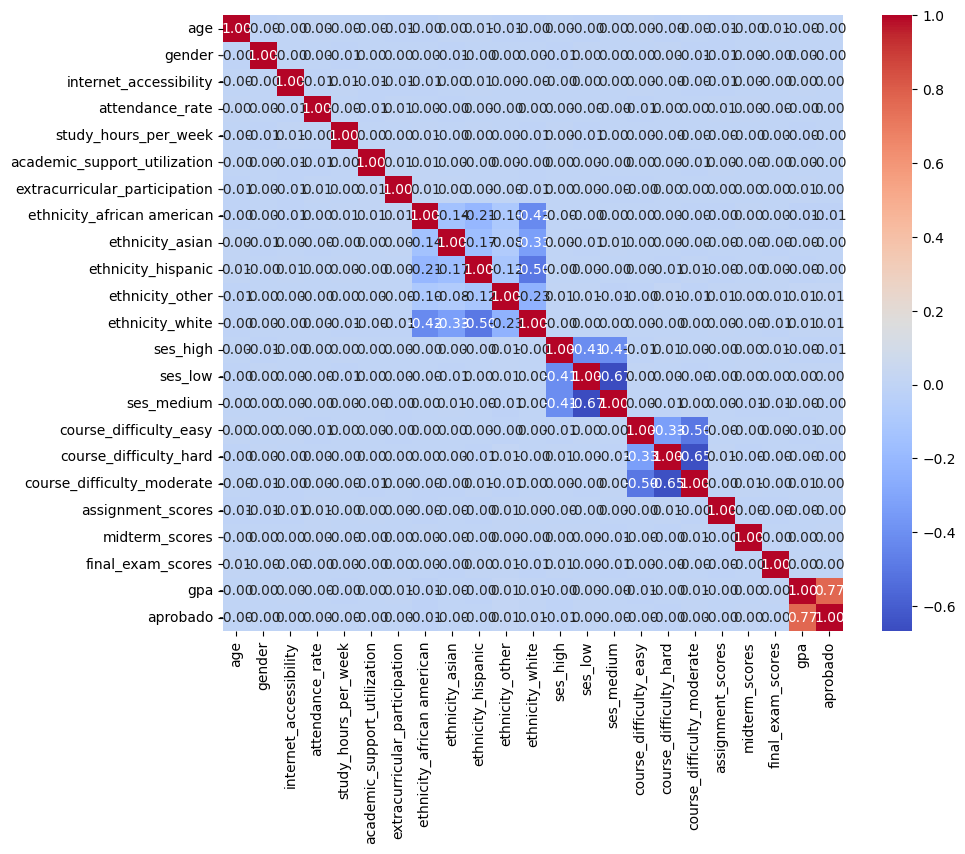

In [20]:

# Suponiendo que ya tienes un DataFrame llamado tabla2
# tabla2 = pd.read_csv('ruta/a/tu/archivo.csv')  # Si necesitas cargar los datos desde un archivo
# Seleccionar solo las columnas numéricas
tabla1_numerica = tabla1.select_dtypes(include=['number'])
# Obtener la matriz de correlación
matriz_correlacion = tabla1_numerica.corr()
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))
# Dibujar el mapa de calor
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f')
# Mostrar el gráfico
plt.show()

# _________________________________
# TRAIN TEST SPLIT

In [21]:
tabla1.head(1)


,age,gender,internet_accessibility,attendance_rate,study_hours_per_week,academic_support_utilization,extracurricular_participation,ethnicity_african american,ethnicity_asian,ethnicity_hispanic,ethnicity_other,ethnicity_white,ses_high,ses_low,ses_medium,course_difficulty_easy,course_difficulty_hard,course_difficulty_moderate,assignment_scores,midterm_scores,final_exam_scores,gpa,aprobado
0,25,0,1,0,17,0,0,0,0,0,0,1,0,1,0,0,1,0,83,56,74,2,1


In [22]:
features = tabla1.drop(columns = ["aprobado", "gpa"])
target = tabla1["aprobado"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.30, random_state=42)

# CON NORMALIZER

In [24]:
normalizer = MinMaxScaler()

normalizer.fit(X_train)

MinMaxScaler()

In [25]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [26]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

# _________________________________
# RandomForestClassifier

In [27]:


# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Results:")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Results:
[[    0  2923]
 [    6 15475]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2923
           1       0.84      1.00      0.91     15481

    accuracy                           0.84     18404
   macro avg       0.42      0.50      0.46     18404
weighted avg       0.71      0.84      0.77     18404



# _________________________________
# RandomizedSearchCV

In [28]:
grid = {"n_estimators": [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)],
        "estimator__max_leaf_nodes": [int(x) for x in np.linspace(start = 50, stop = 300, num = 5)],
        "estimator__max_depth":[int(x) for x in np.linspace(5, 55, num = 5)]}

In [29]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor())

model = RandomizedSearchCV(estimator = ada_reg, param_distributions = grid, n_iter = 10, cv = 5, n_jobs = -1)

In [30]:
model.fit(X_train_norm,y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor()),
                   n_jobs=-1,
                   param_distributions={'estimator__max_depth': [5, 17, 30, 42,
                                                                 55],
                                        'estimator__max_leaf_nodes': [50, 112,
                                                                      175, 237,
                                                                      300],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]})

In [31]:
model.best_params_

{'n_estimators': 20,
 'estimator__max_leaf_nodes': 175,
 'estimator__max_depth': 5}

In [32]:
best_model = model.best_estimator_

In [33]:
pred = best_model.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test))
print("R2 score", best_model.score(X_test_norm, y_test))

MAE 0.26735287590155343
RMSE 0.13463953244608468
R2 score -0.007788081733310692


# _________________________________
# RandomForestRegressor


In [34]:


# Crear el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)


R² Score: -0.05024296717840038
Mean Squared Error: 0.140311464898935


# RandomForestClassifier

In [35]:
# Crear y entrenar el modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)
# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)
# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[    2  2921]
 [    6 15475]]
              precision    recall  f1-score   support

           0       0.25      0.00      0.00      2923
           1       0.84      1.00      0.91     15481

    accuracy                           0.84     18404
   macro avg       0.55      0.50      0.46     18404
weighted avg       0.75      0.84      0.77     18404



#  Gradient Boosting Classifier

In [36]:

# Crear y entrenar el modelo
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred_gbc = gbc_model.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))

[[    1  2922]
 [    5 15476]]
              precision    recall  f1-score   support

           0       0.17      0.00      0.00      2923
           1       0.84      1.00      0.91     15481

    accuracy                           0.84     18404
   macro avg       0.50      0.50      0.46     18404
weighted avg       0.73      0.84      0.77     18404



# Logistic Regression

In [37]:

# Create and train the model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Predict with the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

[[    0  2923]
 [    0 15481]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2923
           1       0.84      1.00      0.91     15481

    accuracy                           0.84     18404
   macro avg       0.42      0.50      0.46     18404
weighted avg       0.71      0.84      0.77     18404



C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

# CON SCALER

In [38]:

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# _________________________________
# RandomForestClassifier

In [39]:


# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Results:")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Results:
[[    0  2923]
 [    7 15474]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2923
           1       0.84      1.00      0.91     15481

    accuracy                           0.84     18404
   macro avg       0.42      0.50      0.46     18404
weighted avg       0.71      0.84      0.77     18404



# _________________________________
# RandomizedSearchCV

In [40]:
grid = {"n_estimators": [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)],
        "estimator__max_leaf_nodes": [int(x) for x in np.linspace(start = 50, stop = 300, num = 5)],
        "estimator__max_depth":[int(x) for x in np.linspace(5, 55, num = 5)]}

In [41]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor())

model = RandomizedSearchCV(estimator = ada_reg, param_distributions = grid, n_iter = 10, cv = 5, n_jobs = -1)

In [42]:
model.fit(X_train_norm,y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor()),
                   n_jobs=-1,
                   param_distributions={'estimator__max_depth': [5, 17, 30, 42,
                                                                 55],
                                        'estimator__max_leaf_nodes': [50, 112,
                                                                      175, 237,
                                                                      300],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]})

In [43]:
model.best_params_

{'n_estimators': 20,
 'estimator__max_leaf_nodes': 112,
 'estimator__max_depth': 17}

In [44]:
best_model = model.best_estimator_

In [45]:
pred = best_model.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test))
print("R2 score", best_model.score(X_test_norm, y_test))

MAE 0.3811603145887872
RMSE 0.16274878274153823
R2 score -0.21818815457640683


# _________________________________
# RandomForestRegressor


In [46]:


# Crear el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)


R² Score: -0.05014381138363855
Mean Squared Error: 0.14029821777874377


# RandomForestClassifier

In [47]:
# Crear y entrenar el modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)
# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)
# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[    2  2921]
 [    6 15475]]
              precision    recall  f1-score   support

           0       0.25      0.00      0.00      2923
           1       0.84      1.00      0.91     15481

    accuracy                           0.84     18404
   macro avg       0.55      0.50      0.46     18404
weighted avg       0.75      0.84      0.77     18404



#  Gradient Boosting Classifier

In [48]:

# Crear y entrenar el modelo
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred_gbc = gbc_model.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))

[[    1  2922]
 [    5 15476]]
              precision    recall  f1-score   support

           0       0.17      0.00      0.00      2923
           1       0.84      1.00      0.91     15481

    accuracy                           0.84     18404
   macro avg       0.50      0.50      0.46     18404
weighted avg       0.73      0.84      0.77     18404



# Logistic Regression

In [49]:

# Create and train the model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Predict with the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

[[    0  2923]
 [    0 15481]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2923
           1       0.84      1.00      0.91     15481

    accuracy                           0.84     18404
   macro avg       0.42      0.50      0.46     18404
weighted avg       0.71      0.84      0.77     18404



C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

# CON ENCODER

In [50]:


# Transformar las columnas categóricas
encoder = OrdinalEncoder()


X_train= encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)


# _________________________________
# RandomForestClassifier

In [51]:


# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Results:")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Results:
[[    0  2923]
 [    6 15475]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2923
           1       0.84      1.00      0.91     15481

    accuracy                           0.84     18404
   macro avg       0.42      0.50      0.46     18404
weighted avg       0.71      0.84      0.77     18404



# _________________________________
# RandomizedSearchCV

In [52]:
grid = {"n_estimators": [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)],
        "estimator__max_leaf_nodes": [int(x) for x in np.linspace(start = 50, stop = 300, num = 5)],
        "estimator__max_depth":[int(x) for x in np.linspace(5, 55, num = 5)]}

In [53]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor())

model = RandomizedSearchCV(estimator = ada_reg, param_distributions = grid, n_iter = 10, cv = 5, n_jobs = -1)

In [54]:
model.fit(X_train_norm,y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor()),
                   n_jobs=-1,
                   param_distributions={'estimator__max_depth': [5, 17, 30, 42,
                                                                 55],
                                        'estimator__max_leaf_nodes': [50, 112,
                                                                      175, 237,
                                                                      300],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]})

In [55]:
model.best_params_

{'n_estimators': 20,
 'estimator__max_leaf_nodes': 237,
 'estimator__max_depth': 5}

In [56]:
best_model = model.best_estimator_

In [57]:
pred = best_model.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test))
print("R2 score", best_model.score(X_test_norm, y_test))

MAE 0.3390071015898977
RMSE 0.1462468727900183
R2 score -0.09466998815944017


# _________________________________
# RandomForestRegressor


In [58]:


# Crear el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)


R² Score: -0.05024296717840038
Mean Squared Error: 0.140311464898935


# RandomForestClassifier

In [59]:
# Crear y entrenar el modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)
# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)
# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[    1  2922]
 [    4 15477]]
              precision    recall  f1-score   support

           0       0.20      0.00      0.00      2923
           1       0.84      1.00      0.91     15481

    accuracy                           0.84     18404
   macro avg       0.52      0.50      0.46     18404
weighted avg       0.74      0.84      0.77     18404



#  Gradient Boosting Classifier

In [60]:

# Crear y entrenar el modelo
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred_gbc = gbc_model.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))

[[    1  2922]
 [    5 15476]]
              precision    recall  f1-score   support

           0       0.17      0.00      0.00      2923
           1       0.84      1.00      0.91     15481

    accuracy                           0.84     18404
   macro avg       0.50      0.50      0.46     18404
weighted avg       0.73      0.84      0.77     18404



# Logistic Regression

In [61]:

# Create and train the model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Predict with the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

[[    0  2923]
 [    0 15481]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2923
           1       0.84      1.00      0.91     15481

    accuracy                           0.84     18404
   macro avg       0.42      0.50      0.46     18404
weighted avg       0.71      0.84      0.77     18404



C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

# CON BALANCEO OVERSAMPLING

In [62]:
# Suponiendo que ya tienes un DataFrame llamado tabla2
# tabla2 = pd.read_csv('ruta/a/tu/archivo.csv')  # Si necesitas cargar los datos desde un archivo
# Crear la nueva columna "GPA_Pass_Fail" basada en GPA
# Balancear las clases usando RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(features, target)
# Añadir la columna balanceada de vuelta al DataFrame
X_resampled['GPA_Pass_Fail'] = y_resampled

# VISUALIZACION CON OVERSAMPLING

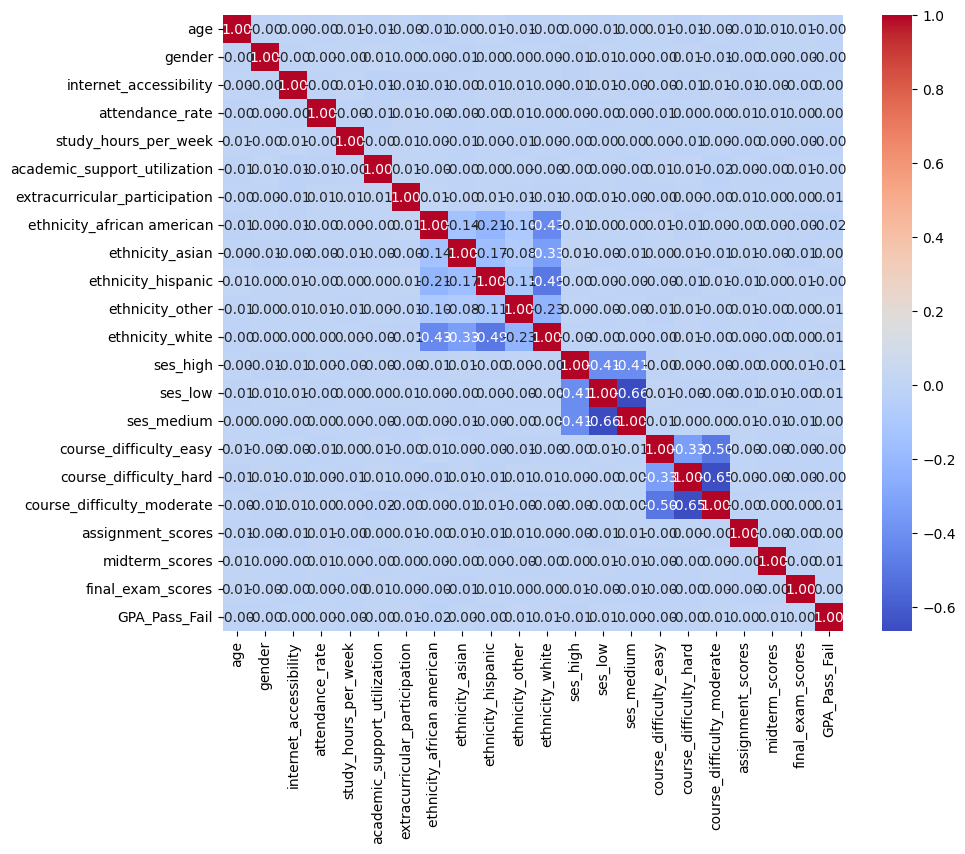

In [63]:

# Suponiendo que ya tienes un DataFrame llamado tabla2
# tabla2 = pd.read_csv('ruta/a/tu/archivo.csv')  # Si necesitas cargar los datos desde un archivo
# Seleccionar solo las columnas numéricas
tabla_X_resampled_numerica = X_resampled.select_dtypes(include=['number'])
# Obtener la matriz de correlación
matriz_correlacion = tabla_X_resampled_numerica.corr()
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))
# Dibujar el mapa de calor
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f')
# Mostrar el gráfico
plt.show()

# _________________________________
# RandomForestClassifier

In [64]:


# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Results:")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Results:
[[    0  2923]
 [    6 15475]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2923
           1       0.84      1.00      0.91     15481

    accuracy                           0.84     18404
   macro avg       0.42      0.50      0.46     18404
weighted avg       0.71      0.84      0.77     18404



# _________________________________
# RandomizedSearchCV

In [65]:
grid = {"n_estimators": [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)],
        "estimator__max_leaf_nodes": [int(x) for x in np.linspace(start = 50, stop = 300, num = 5)],
        "estimator__max_depth":[int(x) for x in np.linspace(5, 55, num = 5)]}

In [66]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor())

model = RandomizedSearchCV(estimator = ada_reg, param_distributions = grid, n_iter = 10, cv = 5, n_jobs = -1)

In [67]:
model.fit(X_train_norm,y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor()),
                   n_jobs=-1,
                   param_distributions={'estimator__max_depth': [5, 17, 30, 42,
                                                                 55],
                                        'estimator__max_leaf_nodes': [50, 112,
                                                                      175, 237,
                                                                      300],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]})

In [68]:
model.best_params_

{'n_estimators': 20,
 'estimator__max_leaf_nodes': 50,
 'estimator__max_depth': 5}

In [69]:
best_model = model.best_estimator_

In [70]:
pred = best_model.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test))
print("R2 score", best_model.score(X_test_norm, y_test))

MAE 0.36497632874609093
RMSE 0.1548253454589369
R2 score -0.1588805685004928


# _________________________________
# RandomForestRegressor


In [71]:


# Crear el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)


R² Score: -0.05024296717840038
Mean Squared Error: 0.140311464898935


# RandomForestClassifier

In [72]:
# Crear y entrenar el modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)
# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)
# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[    0  2923]
 [    3 15478]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2923
           1       0.84      1.00      0.91     15481

    accuracy                           0.84     18404
   macro avg       0.42      0.50      0.46     18404
weighted avg       0.71      0.84      0.77     18404



#  Gradient Boosting Classifier

In [73]:

# Crear y entrenar el modelo
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred_gbc = gbc_model.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))

[[    1  2922]
 [    5 15476]]
              precision    recall  f1-score   support

           0       0.17      0.00      0.00      2923
           1       0.84      1.00      0.91     15481

    accuracy                           0.84     18404
   macro avg       0.50      0.50      0.46     18404
weighted avg       0.73      0.84      0.77     18404



# Logistic Regression

In [74]:

# Create and train the model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Predict with the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

[[    0  2923]
 [    0 15481]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2923
           1       0.84      1.00      0.91     15481

    accuracy                           0.84     18404
   macro avg       0.42      0.50      0.46     18404
weighted avg       0.71      0.84      0.77     18404



C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Javi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.